<a href="https://colab.research.google.com/github/tejaswaroop2310/Mobile-price-range-pridiction/blob/main/Mobile_price_Range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


#Data Description 

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

In [ ]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#read the data set
data=pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [ ]:
#read the first  five records of the data
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#check the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#check for the missing values in the data
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no missing values in the data set

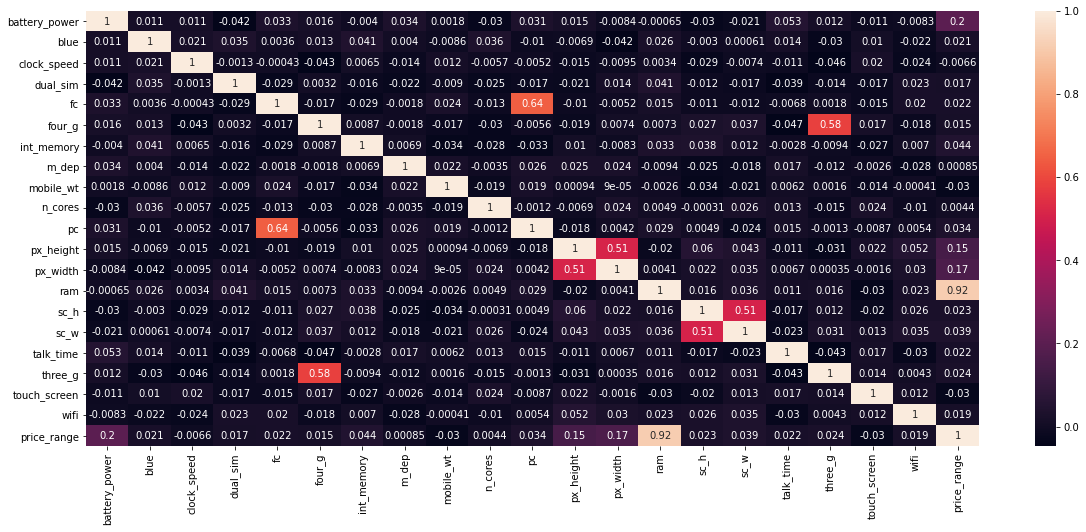

In [ ]:
#plot the correlation plot for the data
plt.figure(figsize=(20, 8))

correlation_rate = data.corr()

sns.heatmap(correlation_rate, annot = True)

Here we can see that there is strong positive correlation between price range and RAM. Also, price range, battery power and 4G/3G. Other features have small positive correlation, that’s why we will try work with every column.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'RAM value')

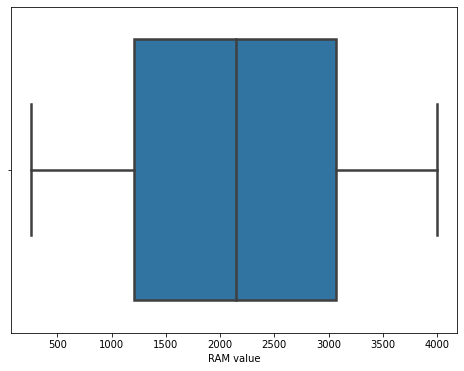

In [ ]:
#plot the boxplot for the Ram
plt.figure(figsize=[8, 6])

sns.boxplot(data['ram'], linewidth=2.5)
plt.xlabel("RAM value")


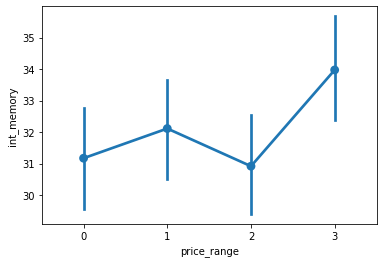

In [ ]:
#plot the graph for internal memory and price range
sns.pointplot(y="int_memory", x="price_range", data=data)

In [ ]:
#get the value count for the 3G 
three_g = data["three_g"].value_counts().values

labels = ["3G Supported", "Not Supported"]

Text(0.5, 1.0, 'Is 3G supported?')

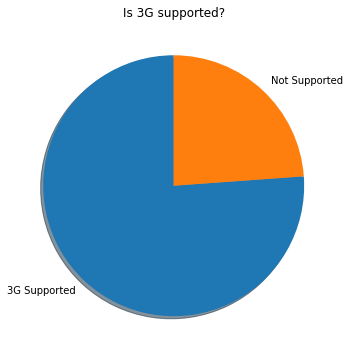

In [ ]:
#plot the pie plot whether  3G support or not 
plt.figure(figsize=[8, 6])
plt.pie(three_g, labels = labels, shadow=True, startangle=90)
plt.title("Is 3G supported?")

Around 75 percent of the phones supports 3G Network

In [ ]:
#Check the value count for 4G support

four_g = data["four_g"].value_counts().values

labels = ["4G Supported", "Not Supported"]

Text(0.5, 1.0, 'Is 4G supported?')

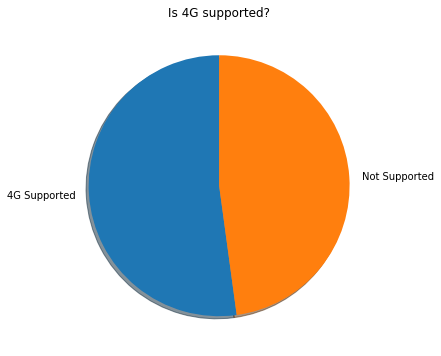

In [ ]:
#plot the pie plot for 4G support
plt.figure(figsize=[8, 6])
plt.pie(four_g, labels = labels, shadow=True, startangle=90)
plt.title("Is 4G supported?")


Around 50 % of the mobile are having 4G feature

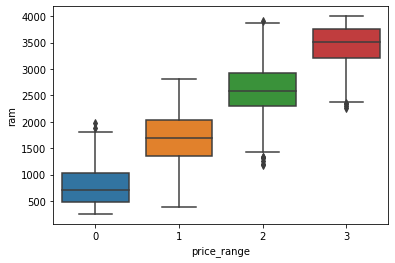

In [ ]:
#plot the box plot for price range and ram 
sns.boxplot(x="price_range", y="ram", data=data)

From the above plot we can see price range and ram are having direct proportionality

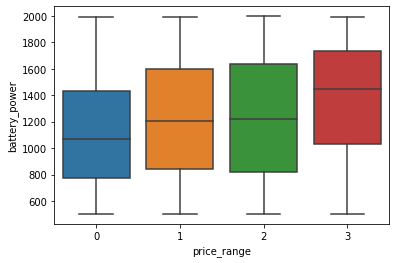

In [ ]:
#plot the boxplot for price range and battery power 
sns.boxplot(x="price_range", y="battery_power", data=data)

There is a slight increase in price range as the battery power increases

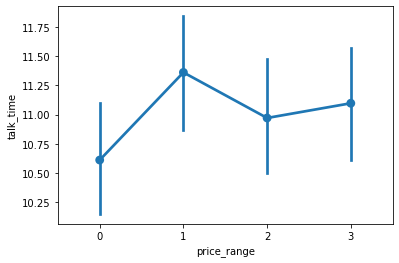

In [ ]:
#plot the point graph for the talk time and price range
sns.pointplot(y="talk_time", x="price_range", data=data)

From this plot we can see medium cost mobiles are having more talk time

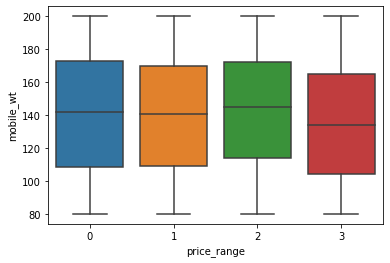

In [ ]:
#plot the box plot for mobile weight and price range
sns.boxplot(y='mobile_wt',x='price_range',data=data);

Mobile weight of all the phone are almost same but expensive phones are having less weight compared to other price ranges

In [ ]:
#drop the predicted variable 
X=data.drop('price_range',axis=1)
y=data['price_range']

In [ ]:
#split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
#function to find better parameters
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

#KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#hperparameter tuning for the knn model
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
               
}

cv = GridSearchCV(knn, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

0.924 (+/-0.048) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
0.925 (+/-0.04) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.927 (+/-0.042) for {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
0.928 (+/-0.034) for {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
0.929 (+/-0.045) for {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
0.931 (+/-0.032) for {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
0.93 (+/-0.038) for {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
0.932 (+/-0.029) for {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
0.931 (+/-0.034) for {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}
0.933 (+/-0.032) for {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}
0.931 (+/-0.034) for {'metric': 'minkowski', 'n_neighbors': 15,

In [ ]:
#checking for the best estimators
cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

In [ ]:
#train the  data with knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [ ]:
#Predict the price range 
from sklearn.metrics import classification_report
prediction = knn.predict(X_test)
print(f"Score of KNN Classifier is  {knn.score(X_test, y_test)}")

#check the classification report
print(classification_report(y_test, prediction))

Score of KNN Classifier is  0.9272727272727272
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.91      0.90      0.90       182
           2       0.86      0.91      0.88       159
           3       0.98      0.94      0.96       162

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



#Decision Tree 

In [ ]:
#hyperparameter tuning for the Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]             
}

cv = GridSearchCV(tree, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

0.749 (+/-0.036) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.749 (+/-0.036) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.749 (+/-0.036) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.749 (+/-0.036) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.749 (+/-0.036) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.754 (+/-0.032) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.754 (+/-0.032) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.749 (+/-0.04) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.75 (+/-0.035) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.749 (+/-0.036) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.814 (+/-0.043) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.821 (+/-0.04

In [ ]:
#checking for the best estimators
cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

#Train the data with Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#predict the price range with the decision tree and get the classification report
predict = dtree .predict(X_test)
print(f"Score of Decision Tree {dtree.score(X_test, y_test)}")

print(classification_report(y_test, predict))

Score of Decision Tree 0.8196969696969697
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       157
           1       0.76      0.74      0.75       182
           2       0.72      0.77      0.74       159
           3       0.92      0.90      0.91       162

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660



#Random Forest Classifier

In [ ]:
#hyperparameter tuning for the Random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}

0.57 (+/-0.294) for {'max_depth': 2, 'n_estimators': 5}
0.675 (+/-0.067) for {'max_depth': 2, 'n_estimators': 50}
0.734 (+/-0.035) for {'max_depth': 2, 'n_estimators': 250}
0.72 (+/-0.078) for {'max_depth': 4, 'n_estimators': 5}
0.81 (+/-0.038) for {'max_depth': 4, 'n_estimators': 50}
0.82 (+/-0.043) for {'max_depth': 4, 'n_estimators': 250}
0.725 (+/-0.043) for {'max_depth': 8, 'n_estimators': 5}
0.86 (+/-0.024) for {'max_depth': 8, 'n_estimators': 50}
0.867 (+/-0.038) for {'max_depth': 8, 'n_estimators': 250}
0.718 (+/-0.072) for {'max_depth': 16, 'n_estimators': 5}
0.854 (+/-0.023) for {'max_depth': 16, 'n_estimators': 50}
0.882 (+/-0.039) for {'max_depth': 16, 'n_estimators': 250}
0.711 (+/-0.128) for {'max_depth': 32, 'n_estimators': 5}
0.863 (+/-0.042) for {'max_depth': 32, 'n_estimators': 50}
0.878 (+/-0.015) for {'max_depth': 32, 'n_estimators': 250}
0.719 (+/-0.082) for {'max_depth': None, 'n_estimators': 5}
0.87 (+/-0.019) 

In [ ]:
#checking for the best parameters
cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

forest.fit(X_train, y_train)
print(f"Score is Random Forest {forest.score(X_test, y_test)}")
print(classification_report(y_test, predict))

Score is Random Forest 0.8803030303030303
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       157
           1       0.76      0.74      0.75       182
           2       0.72      0.77      0.74       159
           3       0.92      0.90      0.91       162

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660



Here we can see KNN classifier is having better score compared to Random forest and Decision tree

#conclusion


*   Around 50 % of the mobile are having 4G feature
*   Price range is increasing with increase in internal memory


*   price range and ram are having direct proportionality
*    medium cost mobiles are having more talk time 

*   KNN classifier is having better score compared to Random forest and Decision tree
*  slight increase in price range as the battery power increases





